<a href="https://colab.research.google.com/github/satyach1231/DATASCIENCE/blob/main/HOUSEPRICE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#  Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
# Step 1: Load Dataset
file_path = "/content/housing.csv"  # Change this if running locally
df = pd.read_csv(file_path)

In [4]:
# Step 2: Display First Few Rows
print("🔹 First 5 rows of dataset:")
print(df.head())

🔹 First 5 rows of dataset:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [5]:
#  Step 3: Check Missing Values
print("\n🔹 Missing Values:")
print(df.isnull().sum())



🔹 Missing Values:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


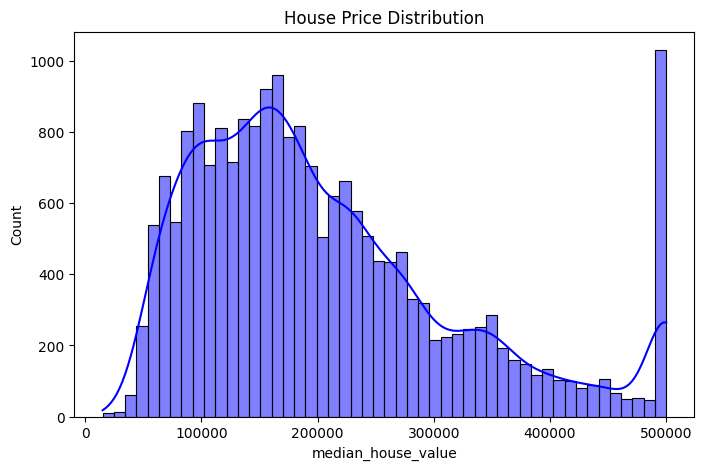

In [6]:
# Step 4: Exploratory Data Analysis (EDA)

#  Price Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["median_house_value"], bins=50, kde=True, color="blue")
plt.title("House Price Distribution")
plt.show()

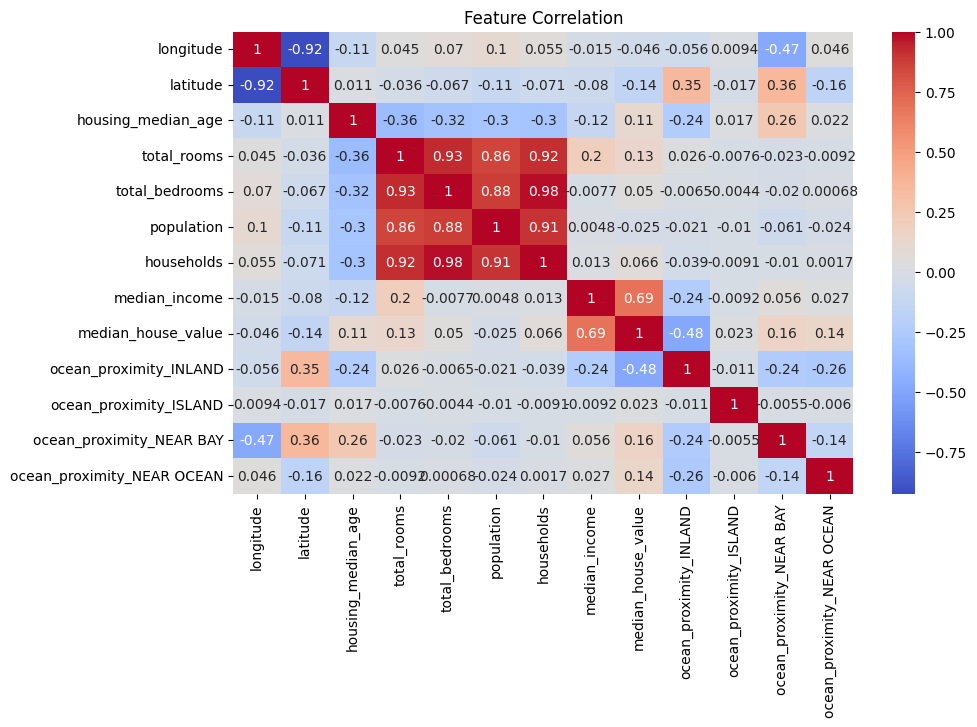

In [8]:
#  Fix: Convert Categorical Column to Numeric
df_encoded = pd.get_dummies(df, columns=["ocean_proximity"], drop_first=True)

#  Correlation Matrix (Now Works Fine)
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()


In [9]:
#  Step 5: Data Preprocessing
# Dropping non-numeric categorical features (for now)
df.drop(columns=["ocean_proximity"], inplace=True, errors='ignore')

# Handling Missing Values (Filling with Median)
df.fillna(df.median(), inplace=True)

In [10]:
# Splitting Data
X = df.drop(columns=["median_house_value"])  # Features
y = df["median_house_value"]  # Target Variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
#  Step 6: Standardizing Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
#  Step 7: Train Models

#  Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [13]:
#  Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

#  XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [15]:
#  Step 8: Model Evaluation

#  Function to Evaluate Models
def evaluate_model(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{name} Performance:")
    print(f"🔹 Mean Absolute Error (MAE): {mae:.3f}")
    print(f"🔹 Mean Squared Error (MSE): {mse:.3f}")
    print(f"🔹 Root Mean Squared Error (RMSE): {rmse:.3f}")
    print(f"🔹 R2 Score: {r2:.3f}")

In [16]:
#  Evaluate All Models
evaluate_model(lr_model, X_test_scaled, y_test, "Linear Regression")
evaluate_model(rf_model, X_test, y_test, "Random Forest")
evaluate_model(xgb_model, X_test, y_test, "XGBoost")


Linear Regression Performance:
🔹 Mean Absolute Error (MAE): 51810.484
🔹 Mean Squared Error (MSE): 5059928371.165
🔹 Root Mean Squared Error (RMSE): 71133.173
🔹 R2 Score: 0.614

Random Forest Performance:
🔹 Mean Absolute Error (MAE): 32093.649
🔹 Mean Squared Error (MSE): 2488059936.859
🔹 Root Mean Squared Error (RMSE): 49880.456
🔹 R2 Score: 0.810

XGBoost Performance:
🔹 Mean Absolute Error (MAE): 32790.555
🔹 Mean Squared Error (MSE): 2430566080.586
🔹 Root Mean Squared Error (RMSE): 49300.772
🔹 R2 Score: 0.815


In [17]:


#  Function to Take User Input & Predict Price
def predict_price():
    print("\n Enter details for prediction:")

    # Input Features (Matching the dataset)
    longitude = float(input("Longitude: "))
    latitude = float(input("Latitude: "))
    housing_median_age = float(input("Housing Median Age: "))
    total_rooms = float(input("Total Rooms: "))
    total_bedrooms = float(input("Total Bedrooms: "))
    population = float(input("Population: "))
    households = float(input("Households: "))
    median_income = float(input("Median Income: "))

    # Convert input into a NumPy array & reshape
    input_data = np.array([[longitude, latitude, housing_median_age, total_rooms,
                             total_bedrooms, population, households, median_income]])

    # Scale Input Data (Same scaler used before)
    input_data_scaled = scaler.transform(input_data)

    # Make Prediction (Use Best Model: XGBoost)
    predicted_price = xgb_model.predict(input_data_scaled)

    print(f"\n🏡 Predicted House Price: ${predicted_price[0]:,.2f}")

# 🔥 Call the function to get predictions
predict_price()



🔹 Enter details for prediction:
Longitude: -122.23
Latitude: 37.88
Housing Median Age: 25
Total Rooms: 4000
Total Bedrooms: 800
Population: 2000
Households: 850
Median Income: 5.0

🏡 Predicted House Price: $152,788.41


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
